# Importing the Reddit dataset


In [ ]:
# Importing packages, libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.util import ngrams

In [ ]:
# Reddit training data
reddit_data = pd.read_csv('REDDIT-train-balanced-sarcasm.csv')
reddit_data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


# Data Cleaning - Removing Missing Data



In [ ]:
# Check for NaN/missing values in the training data
missing_data = reddit_data.isnull()
missing_data= reddit_data[reddit_data.isnull().any(axis=1)]
missing_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
56269,1,NaN,SodokuIRL,leagueoflegends,1,1,0,2016-09,2016-09-28 08:23:04,"LPL shitshow, EU LCS shitshow. What isn't a sh..."
68590,1,NaN,TossTheDog,westchesterpa,1,-1,-1,2016-10,2016-10-11 20:25:52,Car fires smell delicious to you? You should p...
135348,0,NaN,So12rovv,R6STeams,1,-1,-1,2016-12,2016-12-22 17:24:05,Will do. EU or NA?
199910,0,NaN,Khvostov_7g-02,tf2,1,1,0,2016-05,2016-05-16 05:46:43,"woah, thanks."
258718,1,NaN,PeaceLovePositivity,vaporents,5,5,0,2016-06,2016-06-22 20:37:11,"No, doing drugs while forming a fetus (your ki..."


In [ ]:
# Check the number of datapoints with missing values
print('The number of datapoints with missing values is:',len(missing_data))

The number of datapoints with missing values is: 53


In [ ]:
# Remove rows with missing data
reddit_data = pd.concat([reddit_data, missing_data, missing_data]).drop_duplicates(keep=False)
reddit_data

,label,comment,word_count,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,You do know west teams play against west teams...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,"They were underdogs earlier today, but since G...",19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,"This meme isn't funny none of the ""new york ni...",12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,I could use one of those tools.,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010822,1,"whatever you do, don't vote green!",6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010823,1,Perhaps this is an atheist conspiracy to make ...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010824,1,The Slavs got their own country - it is called...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Reduce the df to contain necessary data only
reddit_data = reddit_data[['label','comment']]
reddit_data

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.
...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...
1010822,1,"whatever you do, don't vote green!"
1010823,1,Perhaps this is an atheist conspiracy to make ...
1010824,1,The Slavs got their own country - it is called...


# Exploratory Data Analysis (EDA)

## Checking Class Distributions

The dataset is balanced as it has approximately equal parts sarcastic and non-sarcastic comments.

In [ ]:
# Check whether the data is balanced
print('The dataset is already balanced:')
reddit_data['label'].value_counts()

The dataset is already balanced:


1    481205
0    473228
Name: label, dtype: int64

## Analysis of average sarcastic and non-sarcastic comment length

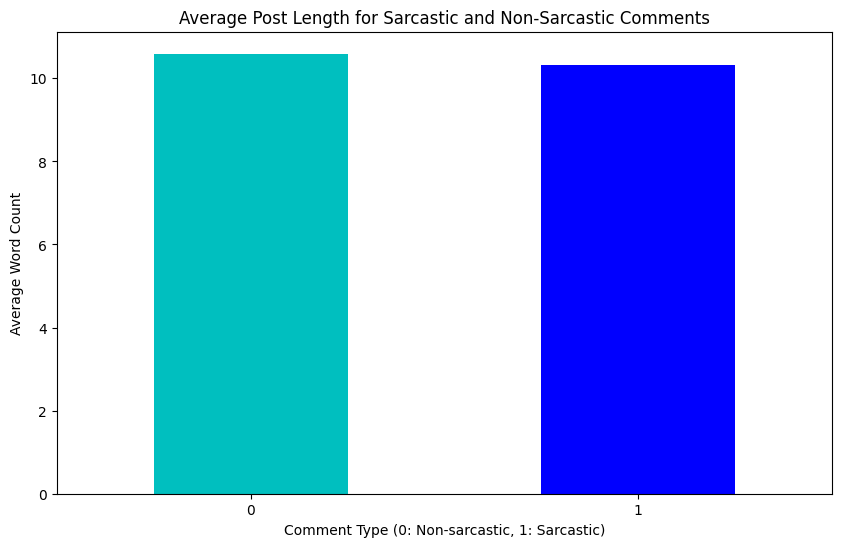

The avarege post lenght is:


label
0    10.591973
1    10.330584
Name: word_count, dtype: float64

In [ ]:
# Create the word_count column
reddit_data = reddit_data.copy()
reddit_data['word_count'] = reddit_data['comment'].apply(lambda x: len(str(x).split()))

# Group by label and calculate the mean word count
mean_word_counts = reddit_data.groupby('label')['word_count'].mean()

# Plot the graph
plt.figure(figsize=(10,6))
mean_word_counts.plot(kind='bar', color=['c', 'b'])
plt.title('Average Post Length for Sarcastic and Non-Sarcastic Comments')
plt.xlabel('Comment Type (0: Non-sarcastic, 1: Sarcastic)')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

print('The avarege post lenght is:')
mean_word_counts

## Histograms of wordcount distributions by label

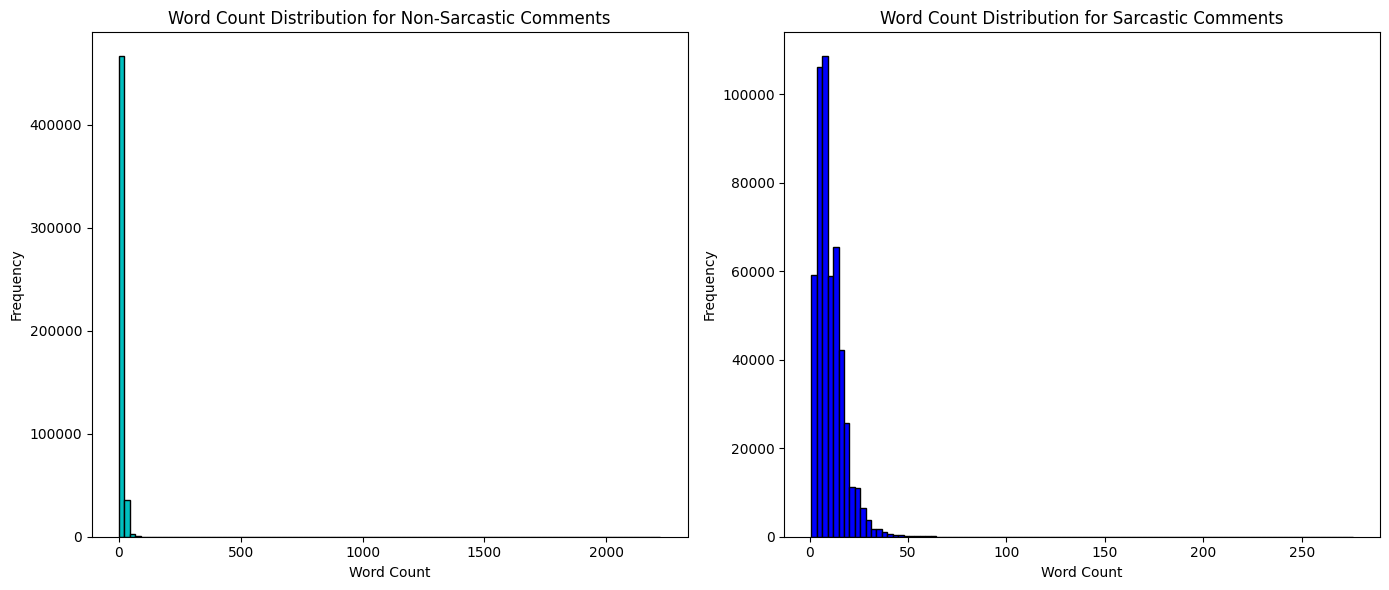

In [ ]:
# Seperate sarcastic and non-sarcastic comments
sarcastic_comments = reddit_data[reddit_data['label'] == 1]
non_sarcastic_comments = reddit_data[reddit_data['label'] == 0]
plt.figure(figsize=(14,6))

# Plot histogram for non-sarcastic comments
plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 2
plt.hist(non_sarcastic_comments['word_count'], bins=100, color='c', edgecolor='black')
plt.title('Word Count Distribution for Non-Sarcastic Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for sarcastic comments
plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 1
plt.hist(sarcastic_comments['word_count'], bins=100, color='b', edgecolor='black')
plt.title('Word Count Distribution for Sarcastic Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Histogram of wordcount distribution

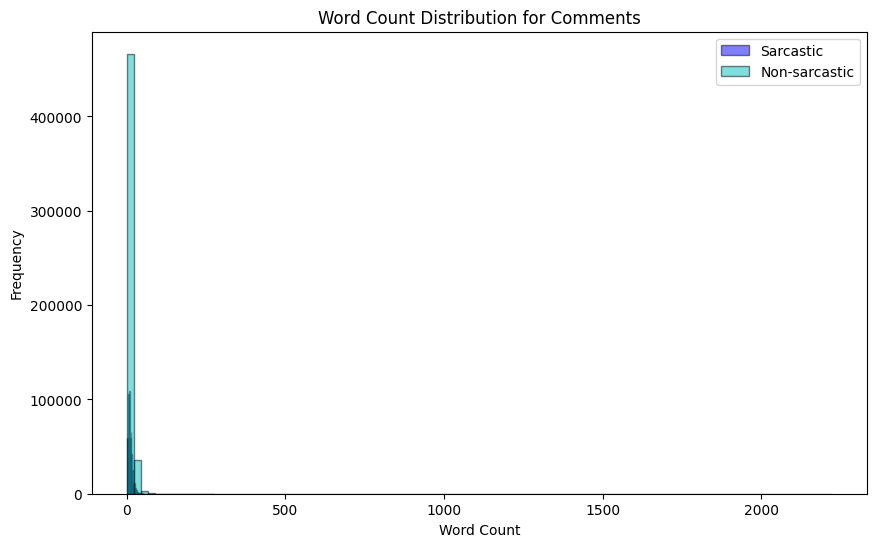

In [ ]:
# Plot histogram for sarcastic comments
plt.figure(figsize=(10,6))
plt.hist(sarcastic_comments['word_count'], bins=100, color='b', alpha=0.5, label='Sarcastic', edgecolor='black')

# Plot histogram for non-sarcastic comments
plt.hist(non_sarcastic_comments['word_count'], bins=100, color='c', alpha=0.5, label='Non-sarcastic', edgecolor='black')

plt.title('Word Count Distribution for Comments')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# sarcastic_comments
sarcastic_comments.describe()

,label,word_count
count,505315.0,505315.000000
mean,1.0,10.330584
std,0.0,7.037140
min,1.0,1.000000
25%,1.0,5.000000
50%,1.0,9.000000
75%,1.0,13.000000
max,1.0,276.000000


In [ ]:
# non_sarcastic_comments
non_sarcastic_comments.describe()

,label,word_count
count,505405.0,505405.000000
mean,0.0,10.591973
std,0.0,13.130424
min,0.0,1.000000
25%,0.0,4.000000
50%,0.0,8.000000
75%,0.0,14.000000
max,0.0,2222.000000


## Mode wordcount

In [ ]:
# Mode for word count of sarcastic comments
mode_sarcastic = sarcastic_comments['word_count'].mode()[0]

# Mode for word count of non-sarcastic comments
mode_non_sarcastic = non_sarcastic_comments['word_count'].mode()[0]

print(f"The mode of the word count for sarcastic comments is: {mode_sarcastic}")
print(f"The mode of the word count for non-sarcastic comments is: {mode_non_sarcastic}")

The mode of the word count for sarcastic comments is: 6
The mode of the word count for non-sarcastic comments is: 5


## My observations:

**Sarcastic Comments:**

- There are 505,315 sarcastic comments in the dataset.
- On average, sarcastic comments have about 10.33 words (mean).
- The standard deviation (std), which measures variability, is around 7.04. This suggests that the length of sarcastic comments can significantly vary, but most of them are within 7 words longer or shorter than the average.
- The shortest sarcastic comment has only 1 word (min), while the longest one has 276 words (max).
- Half of the sarcastic comments (50% percentile, also the median) have 9 words or less. 25% of sarcastic comments have 5 or fewer words, and 75% have 13 or fewer words.
- The mode for sarcastic comments is 6, which means that the most common length for a sarcastic comment is 6 words. Even though the average (mean) length is around 10.33 words, the fact that the mode is less than the mean suggests that there are a number of sarcastic comments that are quite short, which skews the distribution and pulls the mode downwards.


**Non-Sarcastic Comments:**

- There are 505,405 non-sarcastic comments in the dataset.
- On average, non-sarcastic comments have about 10.59 words (mean), slightly more than the sarcastic ones.
- The standard deviation for non-sarcastic comments is higher (about 13.13), meaning there's more variability in the length of these comments compared to sarcastic ones.
- The shortest non-sarcastic comment also has only 1 word (min), but the longest one is considerably longer than the longest sarcastic comment, having 2222 words (max).
- Half of the non-sarcastic comments (50% percentile, or median) have 8 words or less. 25% of non-sarcastic comments have 4 or fewer words, and 75% have 14 or fewer words.
- The mode for non-sarcastic comments is 5, suggesting that the most common length of a non-sarcastic comment is 5 words. This, like with the sarcastic comments, is less than the mean (10.59), indicating a skew in the distribution towards shorter comments.

Summary:

- Both sarcastic and non-sarcastic comments tend to be fairly short, mostly falling below 15 words.
- Non-sarcastic comments show a wider range of lengths and more variability than sarcastic comments.
- However, the central tendency (mean and median) of word counts for both types of comments is quite similar. This suggests that, on average, the length of the comment alone might not be a strong feature to distinguish between sarcastic and non-sarcastic comments.
- The extreme maximum length of non-sarcastic comments could be due to outliers, possibly long, in-depth discussions or rants.
- The most frequent lengths of both sarcastic and non-sarcastic comments are fairly short (5-6 words), suggesting that users tend to keep their comments concise, regardless of whether they are being sarcastic or not.
- Despite having higher average lengths, both categories of comments show a tendency towards brevity. This is consistent with the nature of Reddit comments, which are often short and to the point.
- The slight difference in modes (5 for non-sarcastic and 6 for sarcastic) might indicate a mild tendency for sarcastic comments to be slightly longer than non-sarcastic ones. However, this difference is fairly small, and without further analysis, it's unclear if it's significant.
  


# Creating a Word cloud


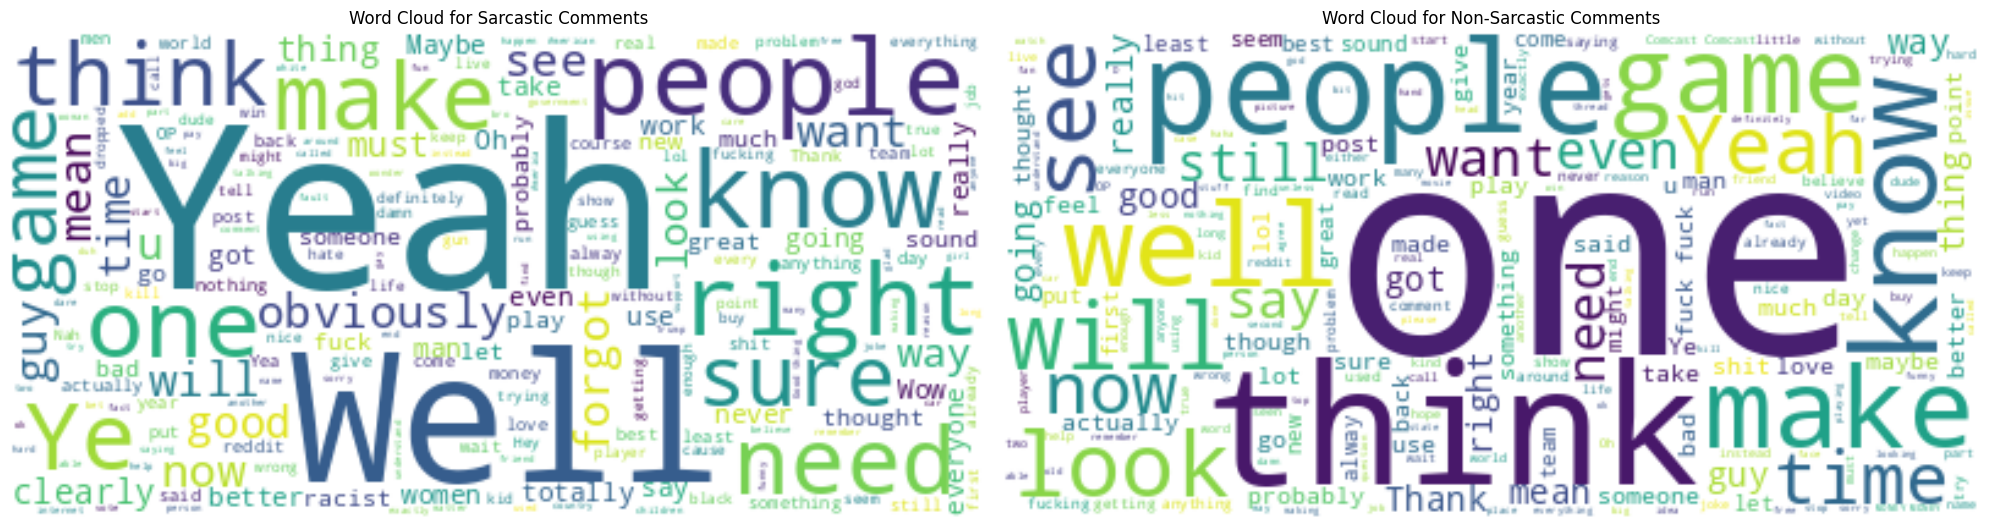

In [ ]:
# Combine all sarcastic comments into one large text
text_sarcastic = " ".join(comment for comment in sarcastic_comments.comment)

# Combine all non-sarcastic comments into one large text
text_non_sarcastic = " ".join(comment for comment in non_sarcastic_comments.comment)

# Generate the word clouds
wordcloud_sarcastic = WordCloud(background_color="white").generate(text_sarcastic)
wordcloud_non_sarcastic = WordCloud(background_color="white").generate(text_non_sarcastic)

# Display the word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Sarcastic Comments')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Non-Sarcastic Comments')
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Finding the Top10 common and least common terms
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess and tokenize text
def process_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

# Process text and find most common and least common words
def analyze_comments(comments):
    words = process_text(" ".join(comments))
    counter = Counter(words)
    most_common = pd.DataFrame(counter.most_common(10), columns=['word', 'frequency'])
    least_common = pd.DataFrame(counter.most_common()[:-11:-1], columns=['word', 'frequency'])
    return most_common, least_common

most_common_sarcastic, least_common_sarcastic = analyze_comments(sarcastic_comments['comment'])
most_common_non_sarcastic, least_common_non_sarcastic = analyze_comments(non_sarcastic_comments['comment'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("Most common words in sarcastic comments:")
most_common_sarcastic

Most common words in sarcastic comments:


,word,frequency
0,yeah,32049
1,like,25967
2,dont,23010
3,people,20757
4,well,18421
5,get,17119
6,thats,16554
7,im,15937
8,would,15591
9,right,15026


In [ ]:
print("Least common words in sarcastic comments:")
least_common_sarcastic

Least common words in sarcastic comments:


,word,frequency
0,pigbirdhuman,1
1,afroarab,1
2,aghaghagh,1
3,hollywoodalways,1
4,barackobama,1
5,konspiracy,1
6,darfur,1
7,provedes,1
8,sco,1
9,25mph,1


In [ ]:
print("\nMost common words in non-sarcastic comments:")
most_common_non_sarcastic


Most common words in non-sarcastic comments:


,word,frequency
0,like,29508
1,dont,20793
2,would,19569
3,im,18108
4,one,17918
5,get,17466
6,think,15384
7,people,15245
8,thats,12907
9,well,12243


In [ ]:
print("\nLeast common words in non-sarcastic comments:")
least_common_non_sarcastic


Least common words in non-sarcastic comments:


,word,frequency
0,dieselelectric,1
1,p42dc,1
2,awpwhores,1
3,thousandfold,1
4,whizzinator,1
5,presidence,1
6,christianjbs,1
7,antisemites,1
8,obonga,1
9,nonsocialists,1


## N-gram Analysis

In [ ]:
# Process text and find most common n-grams
def analyze_comments(comments, ngram_range=(1, 3)):
    words = process_text(" ".join(comments))

    results = []
    for n in range(ngram_range[0], ngram_range[1] + 1):
        ngram_counts = Counter(ngrams(words, n))
        most_common = pd.DataFrame(ngram_counts.most_common(10), columns=['ngram', 'frequency'])
        results.append(most_common)

    return results

unigrams_sarcastic, bigrams_sarcastic, trigrams_sarcastic = analyze_comments(sarcastic_comments['comment'])
unigrams_non_sarcastic, bigrams_non_sarcastic, trigrams_non_sarcastic = analyze_comments(non_sarcastic_comments['comment'])

In [ ]:
print("\nMost common bigrams in sarcastic comments:")
bigrams_sarcastic


Most common bigrams in sarcastic comments:


,ngram,frequency
0,"(im, sure)",5650
1,"(dont, know)",2942
2,"(gon, na)",2126
3,"(sounds, like)",1969
4,"(good, thing)",1644
5,"(got, ta)",1544
6,"(looks, like)",1443
7,"(everyone, knows)",1425
8,"(dont, worry)",1272
9,"(youre, right)",1259


In [ ]:
print("\nMost common trigrams in sarcastic comments:")
trigrams_sarcastic


Most common trigrams in sarcastic comments:


,ngram,frequency
0,"(yeah, im, sure)",570
1,"(im, pretty, sure)",497
2,"(im, gon, na)",293
3,"(yes, im, sure)",257
4,"(got, ta, love)",220
5,"(ive, never, seen)",214
6,"(eye, cant, see)",178
7,"(human, eye, cant)",168
8,"(cant, wait, see)",155
9,"(im, sure, thats)",147


In [ ]:
print("\nMost common bigrams in non-sarcastic comments:")
bigrams_non_sarcastic


Most common bigrams in non-sarcastic comments:


,ngram,frequency
0,"(fuck, fuck)",5274
1,"(comcast, comcast)",2675
2,"(looks, like)",2619
3,"(dont, know)",2286
4,"(gon, na)",2202
5,"(dont, think)",2139
6,"(money, money)",1704
7,"(sounds, like)",1600
8,"(im, sure)",1494
9,"(pretty, sure)",1351


In [ ]:
print("\nMost common trigrams in non-sarcastic comments:")
trigrams_non_sarcastic


Most common trigrams in non-sarcastic comments:


,ngram,frequency
0,"(fuck, fuck, fuck)",5243
1,"(comcast, comcast, comcast)",2667
2,"(money, money, money)",1692
3,"(jerry, jerry, jerry)",1340
4,"(iphone, 7, iphone)",1110
5,"(7, iphone, 7)",1110
6,"(liar, liar, liar)",1069
7,"(raving, raving, raving)",1010
8,"(copy, pasta, copy)",908
9,"(pasta, copy, pasta)",908
